In [1]:
import sys
import os

project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.append(project_root)

%load_ext autoreload
%autoreload 2

In [2]:
COLS_A_PREPROCESAR_TEXTO = os.environ.get("COLS_A_PREPROCESAR_TEXTO").split(",")
COLS_INFO_SENSIBLE = os.environ.get("COLS_INFO_SENSIBLE").split(",")
RUT_EN_FECHA = os.environ.get("RUT_EN_FECHA")

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from datetime import datetime
from src.visualization import visualize

warnings.filterwarnings("ignore")
sns.set_style()
plt.rcParams["figure.figsize"] = (12, 6)

In [5]:
df = pd.read_excel("../data/raw/Base datos configurada INT (Actualizada 26-05-2023).xls")
df_sin_rut = df.drop(columns=COLS_INFO_SENSIBLE)
df_obj = df_sin_rut.select_dtypes("object")

df_obj = pd.DataFrame(
    np.where(pd.isnull(df_obj), df_obj, df_obj.astype(str)), columns=df_obj.columns
)
df_sin_rut.loc[:, df_obj.columns] = df_obj

df_procesada = pd.read_csv("../data/interim/datos_limpios.csv", encoding="latin-1", sep=";")


## Distribucion de Datos Originales

Analizando todas las variables numericas 



,n,EMBARAZO,Aborto,CIANOSIS,HIPERTENSION ARTERIAL PULMONAR,INSUFICIENCIA CARDIACA,Derivado a Equipo Tx,HDN Diagnostico,HDN Terapeutico,Unnamed: 68,...,HDN Diagnostico.3,HDN Terapeutico.3,Unnamed: 80,Año Proced. HDN.4,HDN Terapeutico.4,HDN Diagnostico.4,CARTO,RESINCRO,Unnamed: 99,IMC
count,3540.0,353.000000,44.000000,3441.000000,2604.000000,2580.000000,20.000000,655.0,251.000000,82.0,...,4.0,4.0,1.0,3.000000,3.0,2.0,8.000000,0.0,6.0,190.000000
mean,1.0,1.050992,1.272727,1.924441,1.927803,1.942248,1.450000,1.0,1.023904,1.0,...,1.0,1.0,1.0,2019.333333,1.0,1.0,0.875000,NaN,1.0,21.990896
std,0.0,0.220293,0.499471,0.264330,0.258863,0.236619,0.510418,0.0,0.153057,0.0,...,0.0,0.0,NaN,1.527525,0.0,0.0,0.353553,NaN,0.0,6.488937
min,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.000000,1.0,...,1.0,1.0,1.0,2018.000000,1.0,1.0,0.000000,NaN,1.0,0.000000
25%,1.0,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.0,1.000000,1.0,...,1.0,1.0,1.0,2018.500000,1.0,1.0,1.000000,NaN,1.0,20.229640
50%,1.0,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.0,1.000000,1.0,...,1.0,1.0,1.0,2019.000000,1.0,1.0,1.000000,NaN,1.0,22.718602
75%,1.0,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,1.000000,1.0,...,1.0,1.0,1.0,2020.000000,1.0,1.0,1.000000,NaN,1.0,25.384887
max,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,1.0,...,1.0,1.0,1.0,2021.000000,1.0,1.0,1.000000,NaN,1.0,33.770449


-----------------------------------------
Analizando n


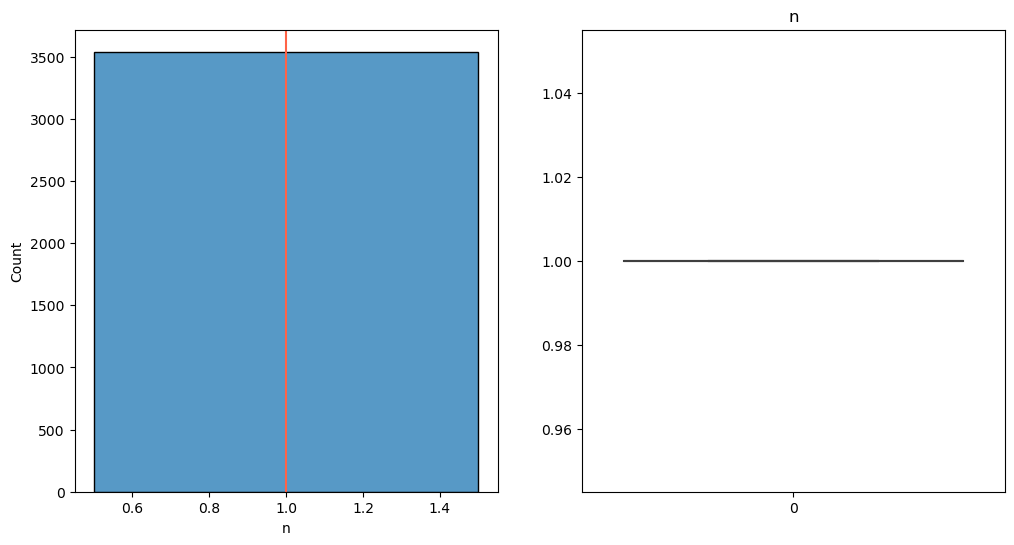

-----------------------------------------
-----------------------------------------
Analizando EMBARAZO


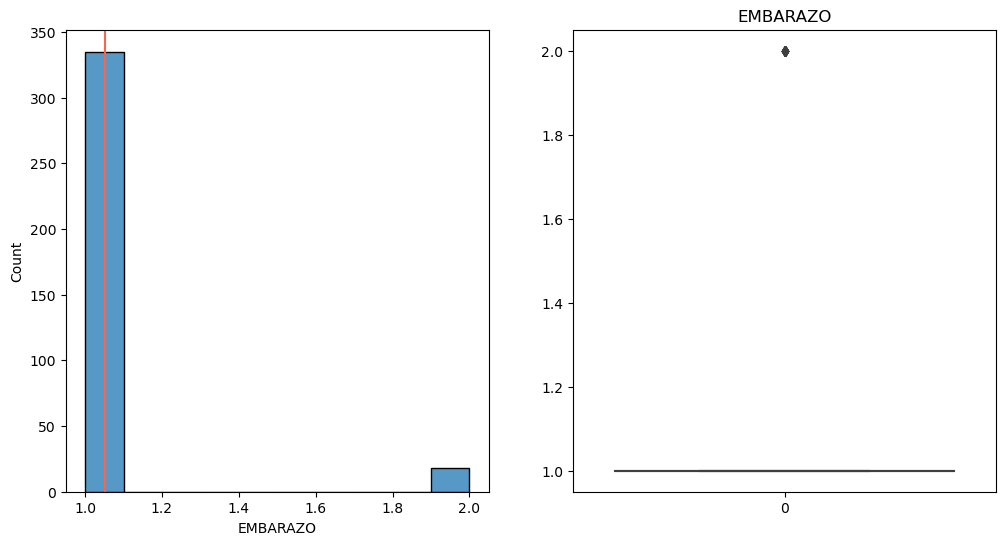

-----------------------------------------
-----------------------------------------
Analizando Aborto


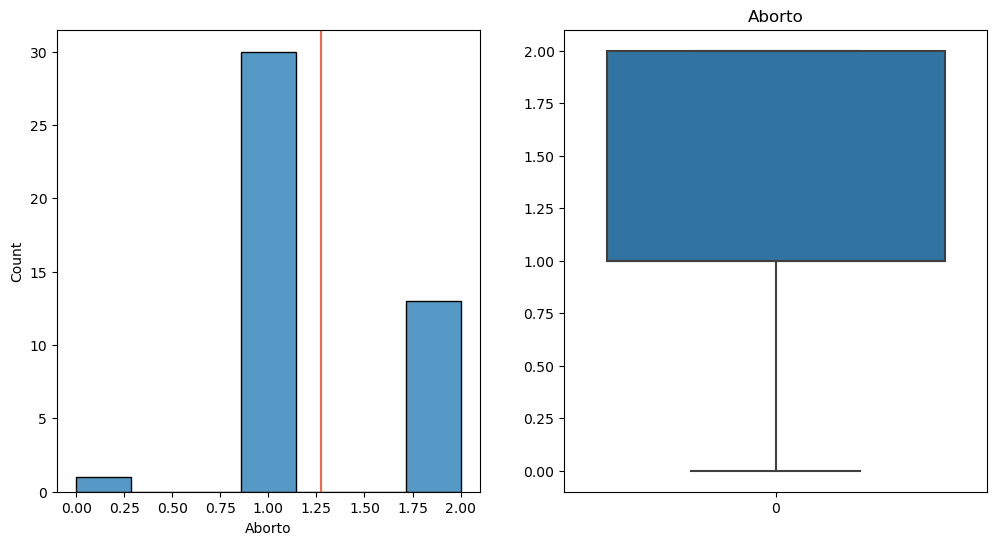

-----------------------------------------
-----------------------------------------
Analizando CIANOSIS


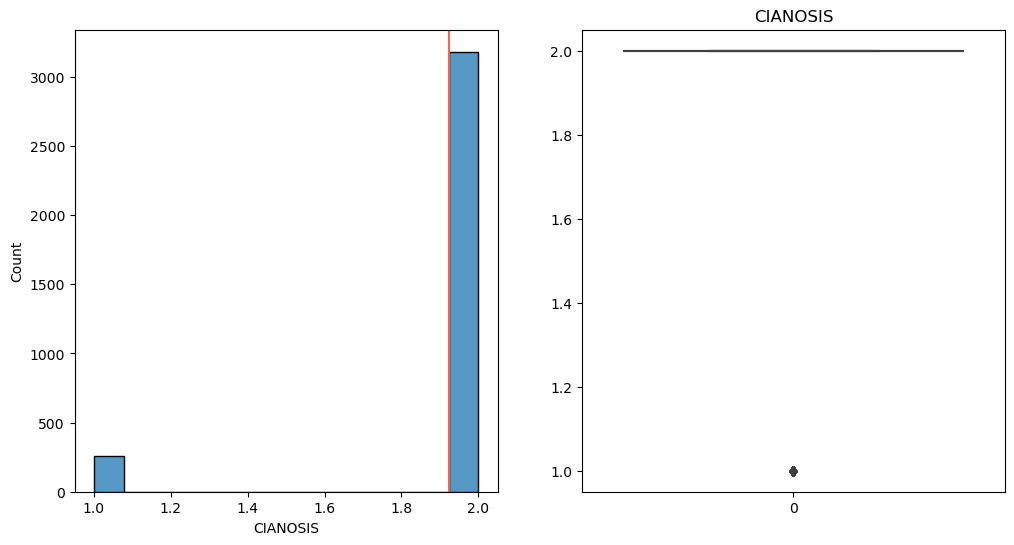

-----------------------------------------
-----------------------------------------
Analizando HIPERTENSION ARTERIAL PULMONAR


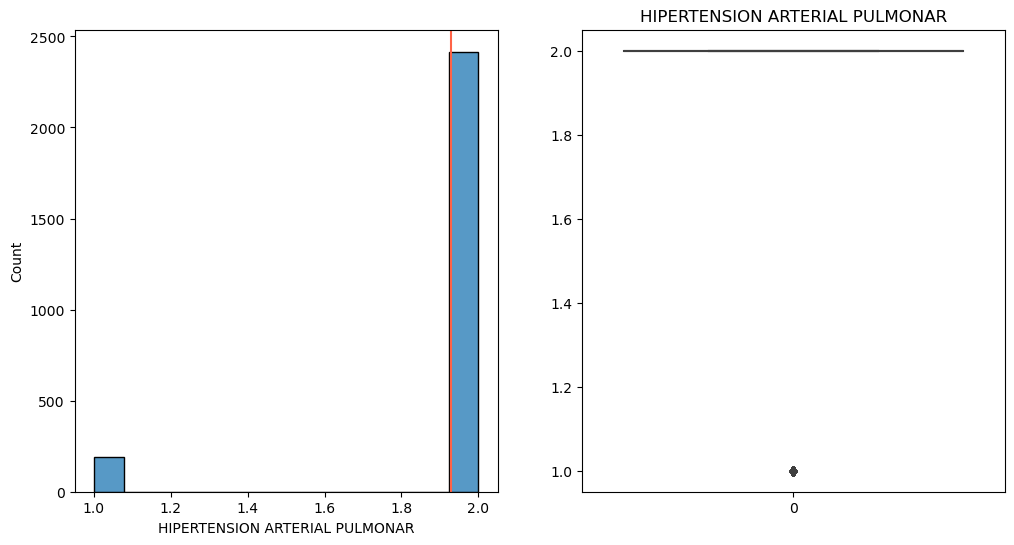

-----------------------------------------
-----------------------------------------
Analizando INSUFICIENCIA CARDIACA


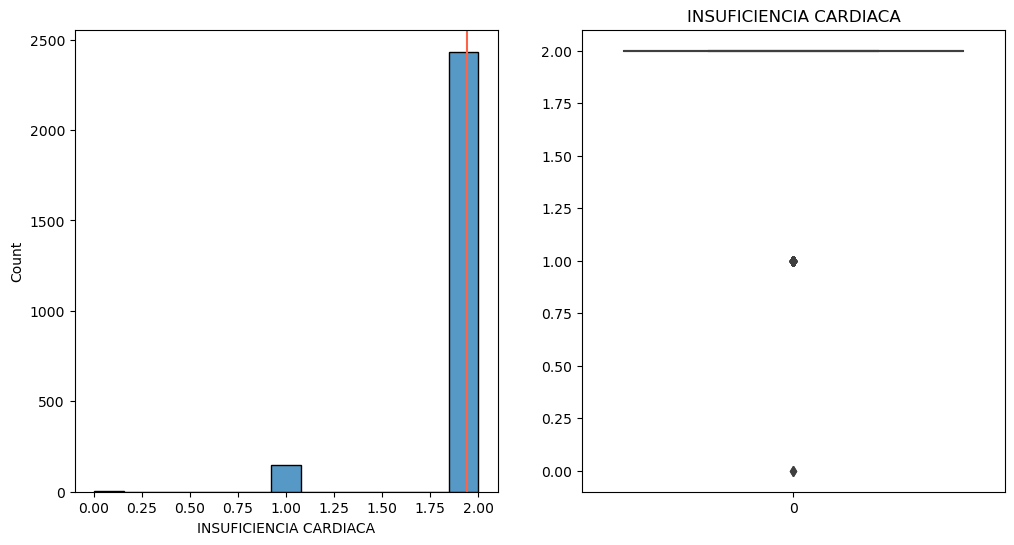

-----------------------------------------
-----------------------------------------
Analizando Derivado a Equipo Tx


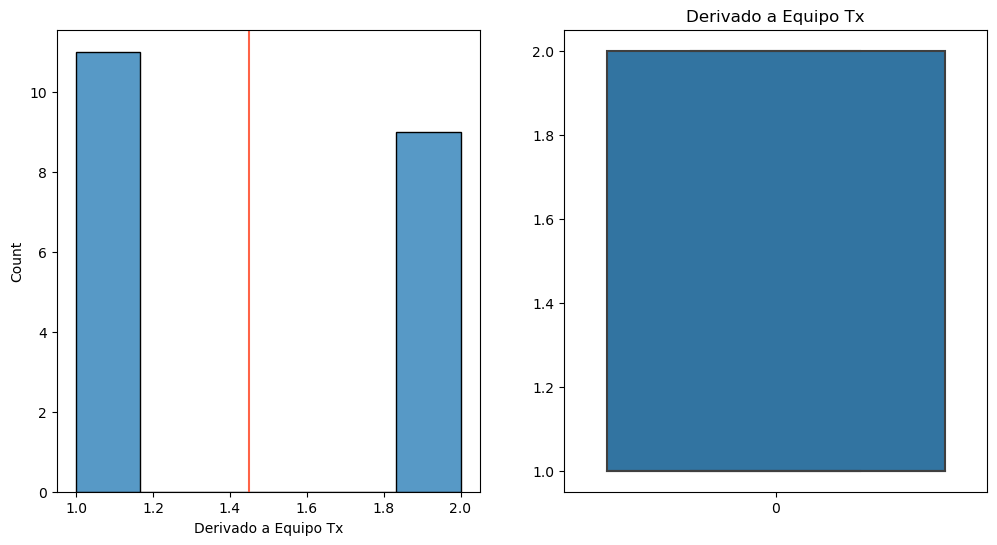

-----------------------------------------
-----------------------------------------
Analizando HDN Diagnostico


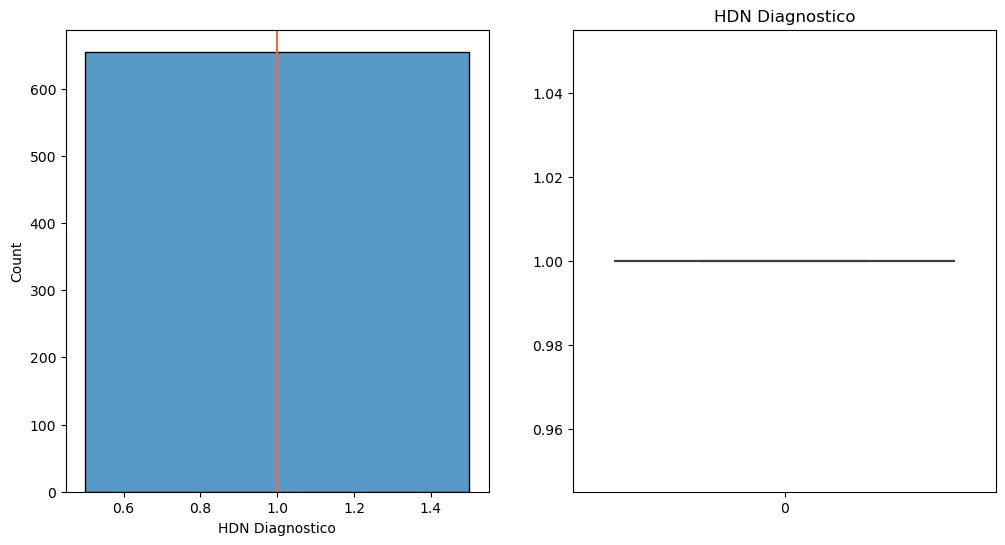

-----------------------------------------
-----------------------------------------
Analizando HDN Terapeutico


KeyboardInterrupt: 

In [6]:
visualize.analizar_distribucion_y_faltantes_variables(df_sin_rut.loc[:, :"Medicamentos"])


## Comparacion de datos Originales y Preprocesados

- Se quiere ver la diferencia entre las columnas antes de ser procesadas y luego de ser procesadas.
El nombre de estas columnas estan en las variables globales al inicio del cuadernillo

### Columnas Preprocesadas

Analizando todas las variables categoricas 

-----------------------------------------
Analizando DIAGNOSTICO PRINCIPAL
Hay 335 valores distintos


,Frecuencia,Porcentaje
CIA,441,0.143368
Tetralogía de Fallot,328,0.106632
CIV,199,0.064694
D-TGA,179,0.058192
Ventriculo Unico Funcional,113,0.036736
...,...,...
Vnetriculo unico funcional,1,0.000325
ventriculo Unico funcional,1,0.000325
Anomalías Válvula tricúspide,1,0.000325
Doble salida de VD (dsvd),1,0.000325


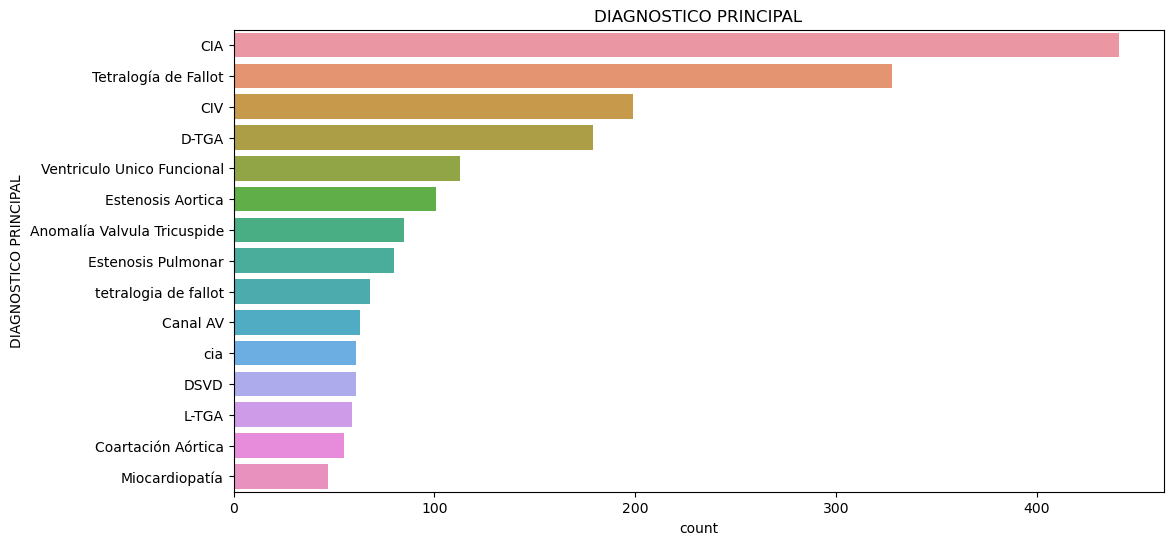

-----------------------------------------
-----------------------------------------
Analizando HOSPITAL
Hay 49 valores distintos


,Frecuencia,Porcentaje
INT,608,0.704519
INT-CM,67,0.077636
UC,54,0.062572
CA,19,0.022016
HRdR,17,0.019699
HLCM,15,0.017381
INT-ET,12,0.013905
no,9,0.010429
DIPRECA,7,0.008111
JJA,6,0.006952


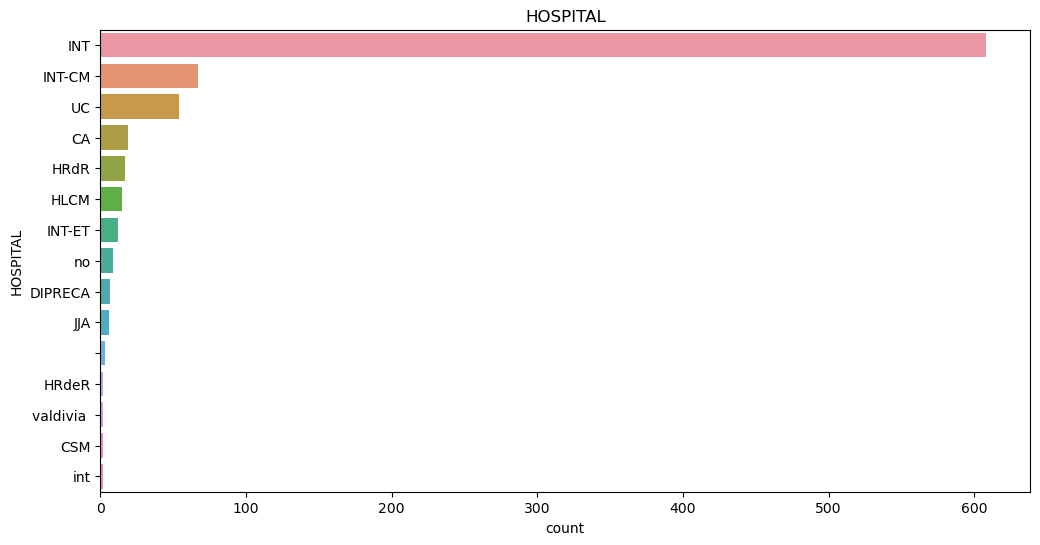

-----------------------------------------
-----------------------------------------
Analizando SEXO
Hay 6 valores distintos


,Frecuencia,Porcentaje
F,1831,0.515339
M,1717,0.483254
f,2,0.000563
DF,1,0.000281
,1,0.000281
B,1,0.000281


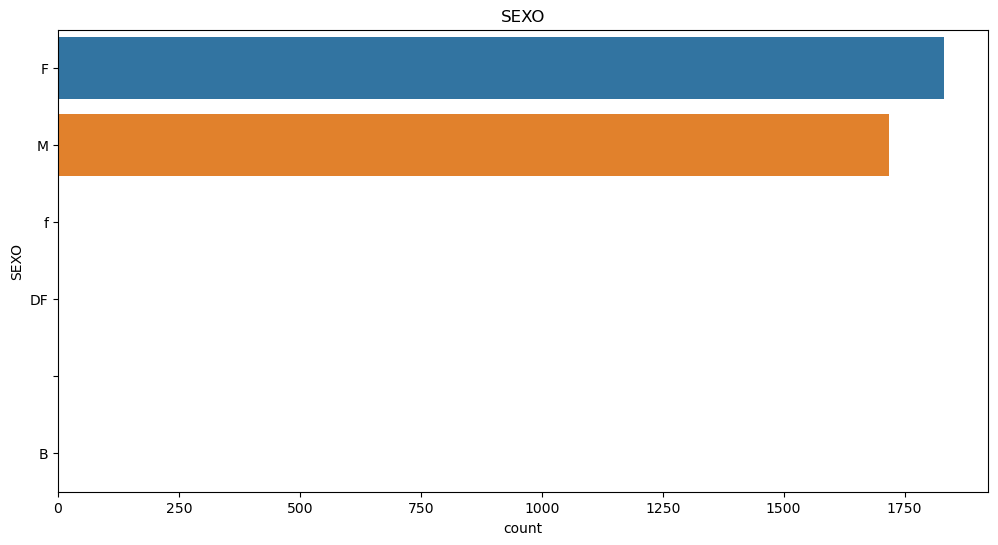

-----------------------------------------
-----------------------------------------
Analizando PREVISION
Hay 40 valores distintos


,Frecuencia,Porcentaje
B,1365,0.413261
A,960,0.290645
D,517,0.156524
C,394,0.119285
Prais,12,0.003633
P,6,0.001817
M,4,0.001211
F,4,0.001211
particular,3,0.000908
Isapre,2,0.000606


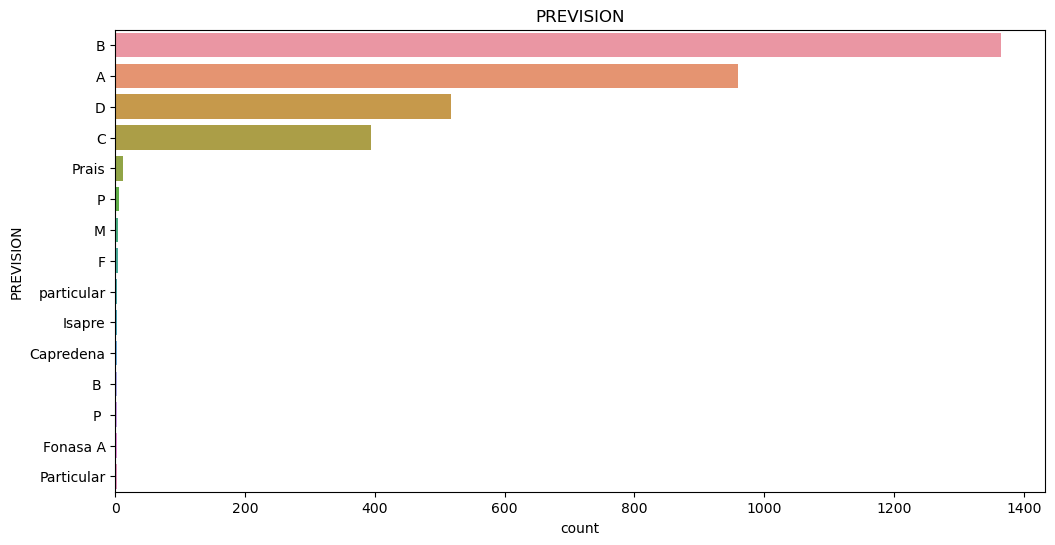

-----------------------------------------
-----------------------------------------
Analizando CENTRO REFERENCIA 
Hay 545 valores distintos


,Frecuencia,Porcentaje
HLCM,1041,0.374057
INT,114,0.040963
HBLT,79,0.028387
HRdR,52,0.018685
UC,45,0.016170
...,...,...
H. de Talca,1,0.000359
hospital metropolitano,1,0.000359
H. Chillán,1,0.000359
Hospital de Ancud,1,0.000359


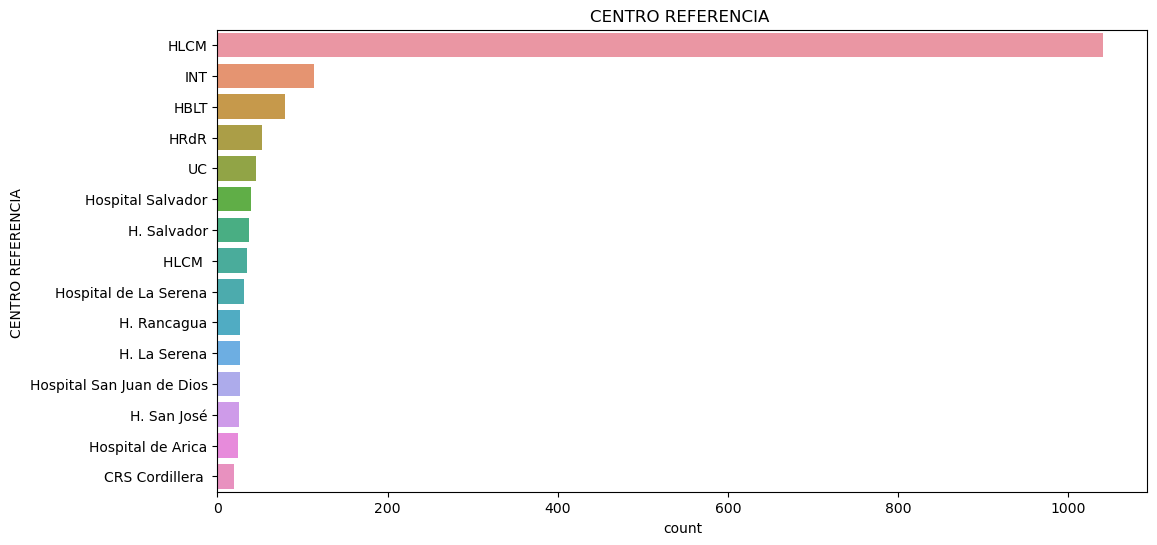

-----------------------------------------
-----------------------------------------
Analizando Region
Hay 182 valores distintos


,Frecuencia,Porcentaje
Región Metropolitana,1631,0.461517
7 Región,247,0.069892
8 Región,221,0.062535
4 Región,212,0.059989
6 Región,196,0.055461
...,...,...
REGIÓN METROPOLITANA,1,0.000283
15 Region,1,0.000283
9° región,1,0.000283
Región de los Rios,1,0.000283


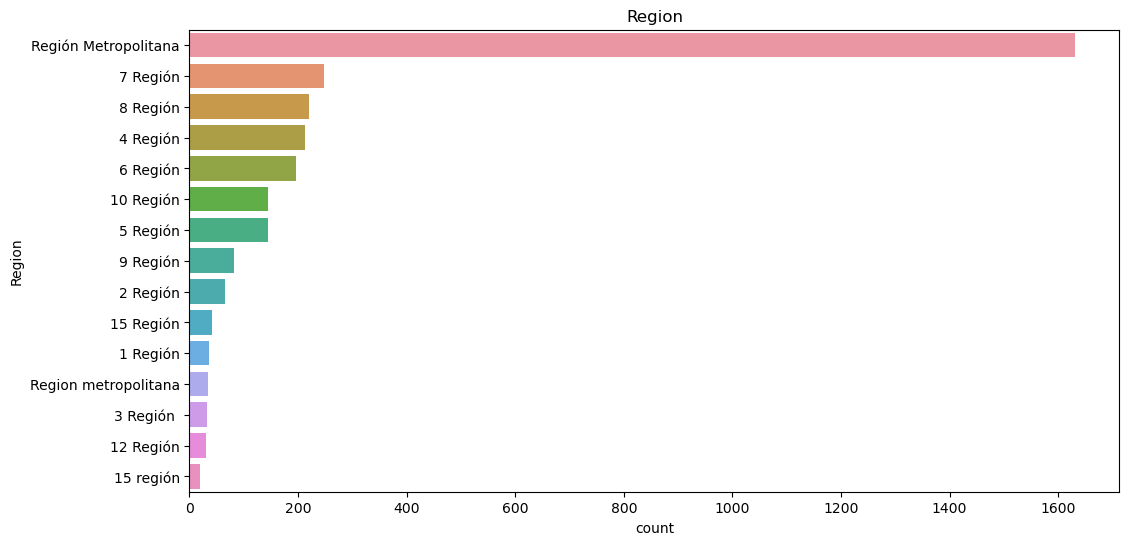

-----------------------------------------
-----------------------------------------
Analizando Clasificación
Hay 78 valores distintos


,Frecuencia,Porcentaje
Cianoticas,1106,0.320487
SHUNT IZQ A DERECHA,1011,0.292959
Miscelaneas,509,0.147493
Lesiones Obstructivas Izquierdas,217,0.062880
Lesiones obstructivas izquierdas,126,0.036511
...,...,...
SHUNT IZQUIERDA DERECHA,1,0.000290
corazon normal,1,0.000290
LESIONES OBTRUCTIVAS DERECHAS,1,0.000290
lesiones obstructivas izquierdas.,1,0.000290


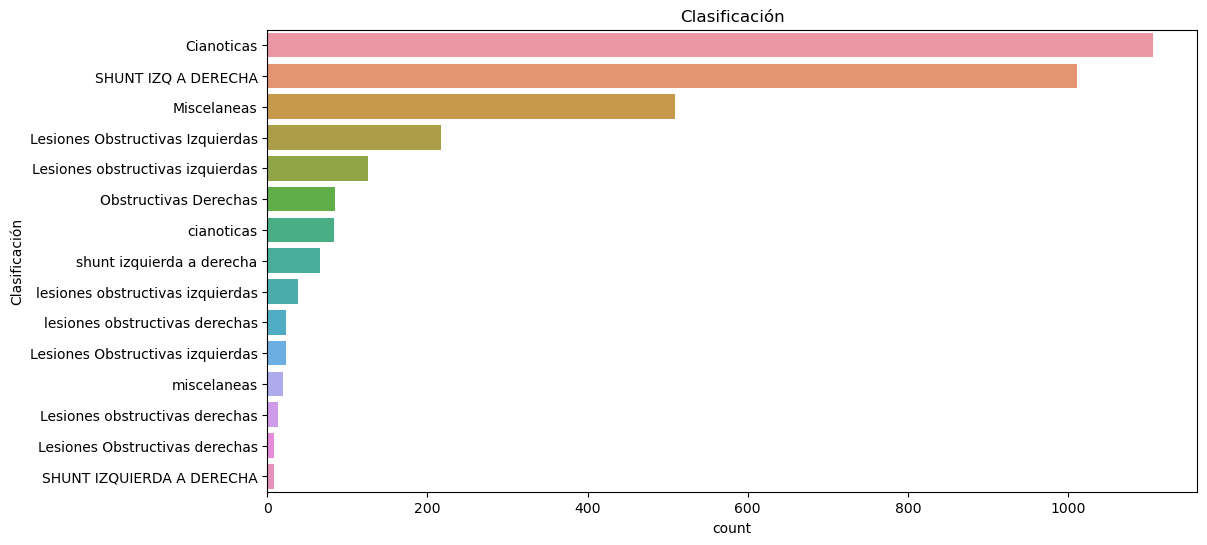

-----------------------------------------
-----------------------------------------
Analizando Procedimiento
Hay 1541 valores distintos


,Frecuencia,Porcentaje
Cierre Con Parche,203,0.076604
Reparación con ventriculotomía y parche transanular,124,0.046792
cierre con Dispositivo,79,0.029811
Shunt BT,78,0.029434
Balonplastía,62,0.023396
...,...,...
cierre CIV con Dispositivo percutaneo (2005 dr. Romero Clinica Alemana),1,0.000377
cx reparadora 2002,1,0.000377
"Cierre Con Parche, pastia mitral y tricuspidea y maze derecho.",1,0.000377
Cierre DAP,1,0.000377


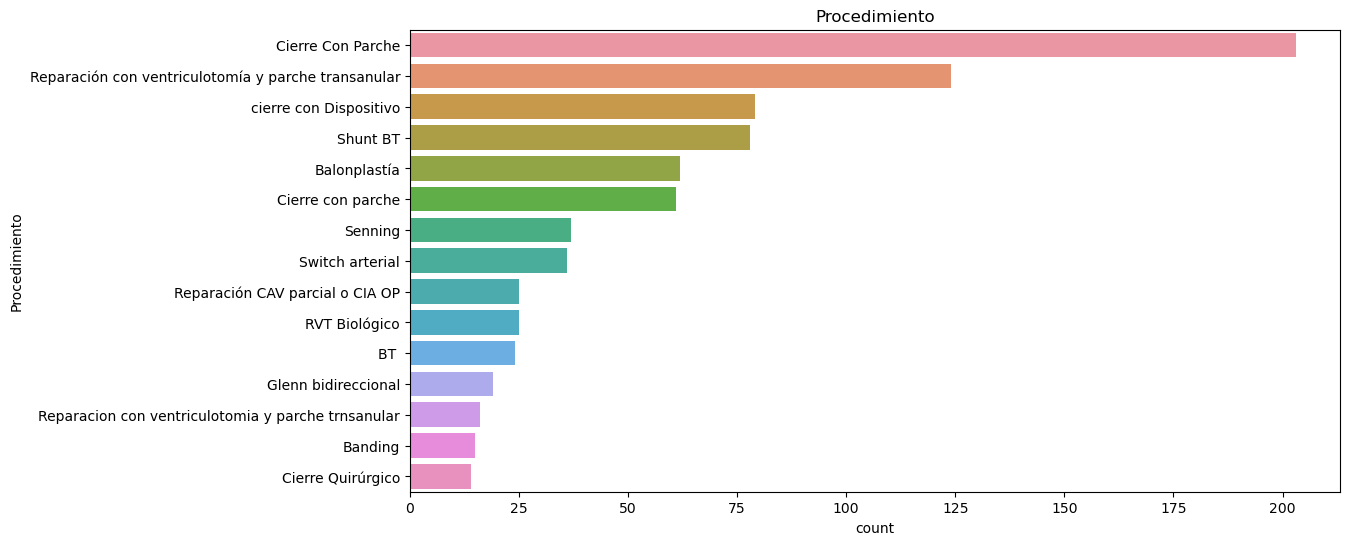

-----------------------------------------
-----------------------------------------
Analizando Complejidad
Hay 40 valores distintos


,Frecuencia,Porcentaje
moderada,1361,0.396446
severa,835,0.243227
baja,811,0.236237
MODERADA,99,0.028838
Moderada,73,0.021264
SEVERA,55,0.016021
BAJA,43,0.012525
no corresponde,29,0.008447
moderado,20,0.005826
Severa,18,0.005243


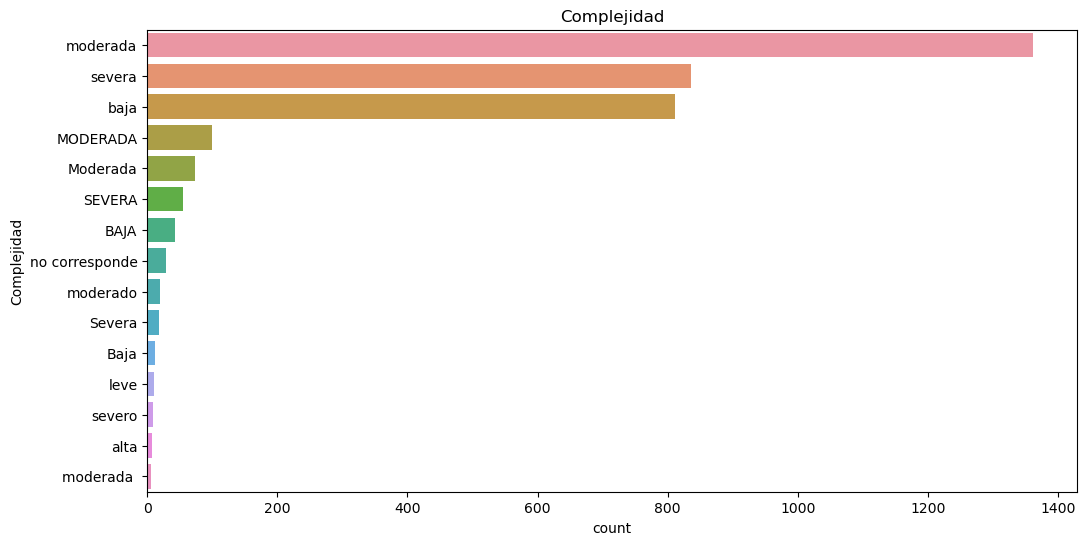

-----------------------------------------


,cantidad_na,porcentaje_na
DIAGNOSTICO PRINCIPAL,495,13.86
HOSPITAL,2708,75.83
SEXO,18,0.50
PREVISION,268,7.50
CENTRO REFERENCIA,788,22.07
Region,37,1.04
Clasificación,120,3.36
Procedimiento,921,25.79
Complejidad,138,3.86


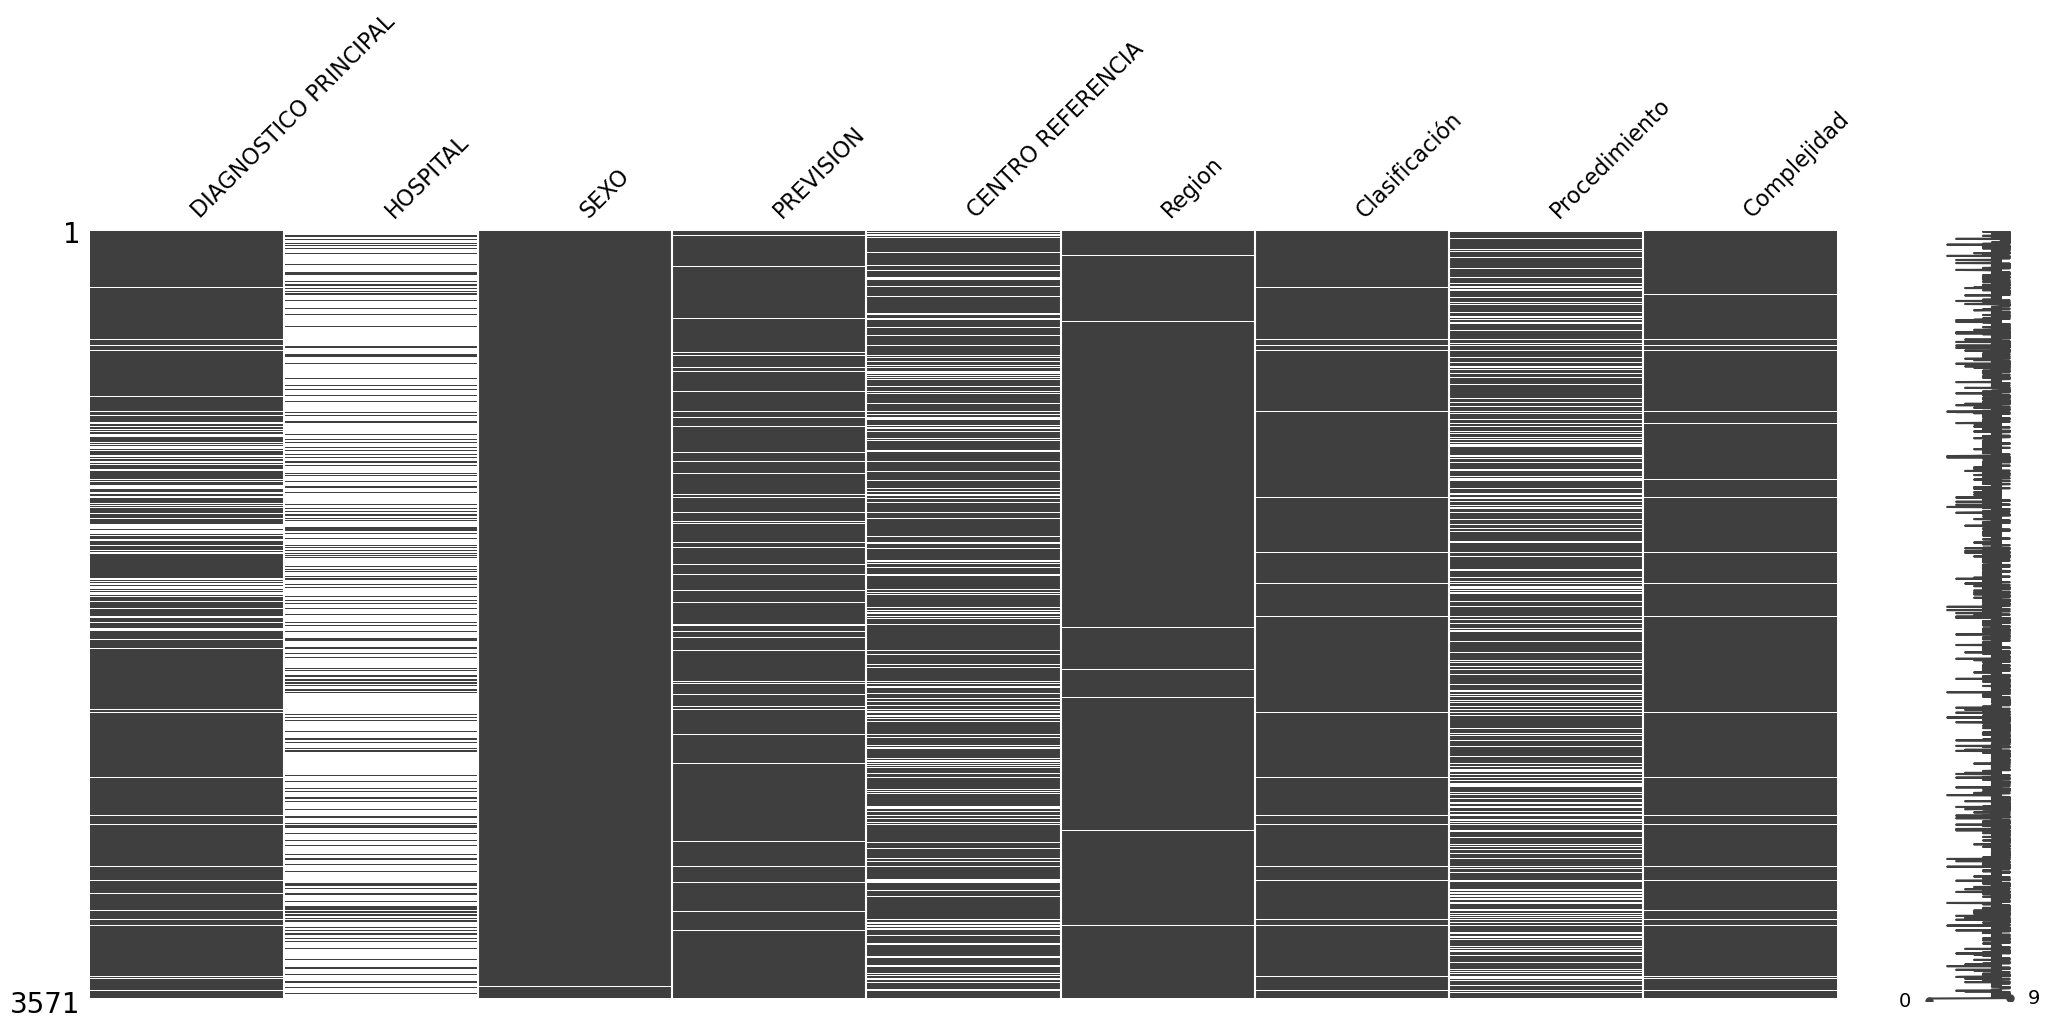

In [ ]:
visualize.analizar_distribucion_y_faltantes_variables(df_sin_rut[COLS_A_PREPROCESAR_TEXTO])


Analizando todas las variables categoricas 

-----------------------------------------
Analizando DIAGNOSTICO PRINCIPAL
Hay 186 valores distintos


,Frecuencia,Porcentaje
cia,520,0.170157
tetralogia fallot,457,0.149542
civ,225,0.073626
ventriculo unico funcional,209,0.068390
d-tga,186,0.060864
...,...,...
estenosis medio ventricular derecha,1,0.000327
valvula aortica,1,0.000327
anomalia coronaria,1,0.000327
tetrologia fallot,1,0.000327


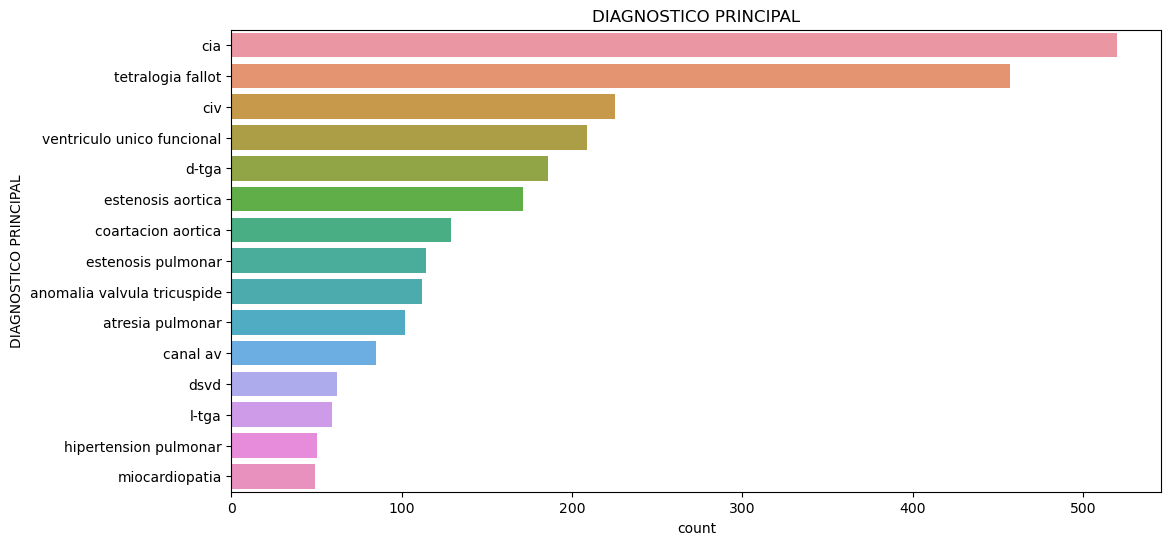

-----------------------------------------
-----------------------------------------
Analizando HOSPITAL
Hay 41 valores distintos


,Frecuencia,Porcentaje
int,614,0.722353
int-cm,68,0.080000
uc,54,0.063529
ca,19,0.022353
hrdr,17,0.020000
hlcm,15,0.017647
int-et,12,0.014118
dipreca,7,0.008235
jja,6,0.007059
csm,2,0.002353


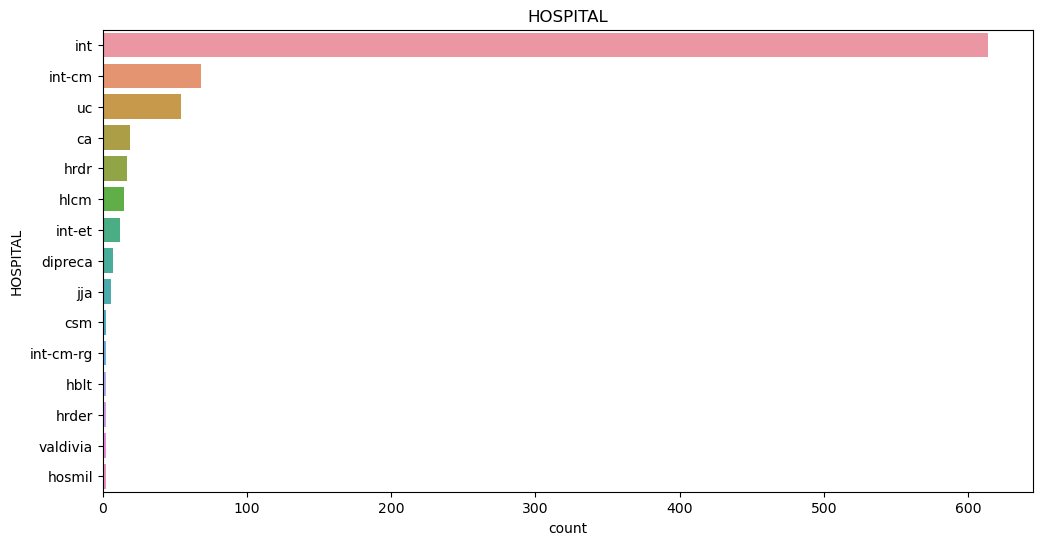

-----------------------------------------
-----------------------------------------
Analizando SEXO
Hay 4 valores distintos


,Frecuencia,Porcentaje
f,1833,0.516047
m,1717,0.483390
df,1,0.000282
b,1,0.000282


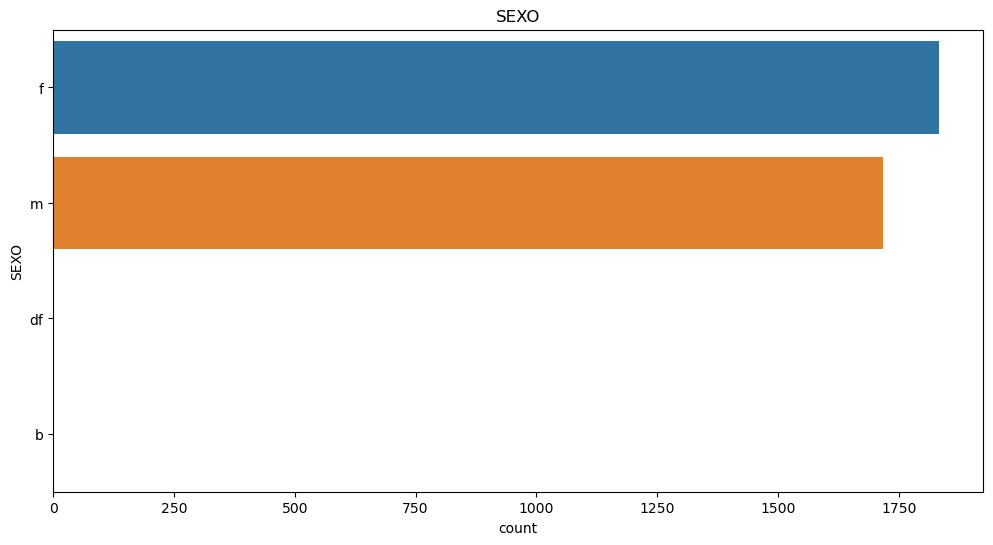

-----------------------------------------
-----------------------------------------
Analizando PREVISION
Hay 24 valores distintos


,Frecuencia,Porcentaje
b,1368,0.584116
d,519,0.221605
c,397,0.169513
prais,13,0.005551
p,8,0.003416
particular,5,0.002135
m,4,0.001708
f,4,0.001708
fonasa,3,0.001281
isapre,3,0.001281


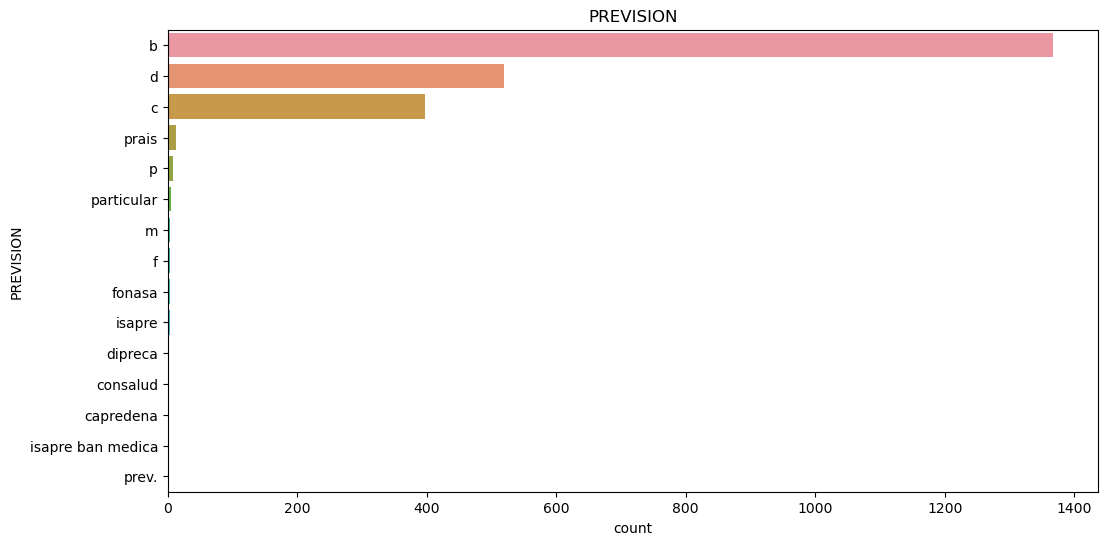

-----------------------------------------
-----------------------------------------
Analizando CENTRO REFERENCIA 
Hay 364 valores distintos


,Frecuencia,Porcentaje
hlcm,1078,0.387630
int,118,0.042431
hblt,79,0.028407
hrdr,61,0.021935
hospital serena,60,0.021575
...,...,...
sta. cruz,1,0.000360
renaico,1,0.000360
h. dipreca,1,0.000360
hospital carmen,1,0.000360


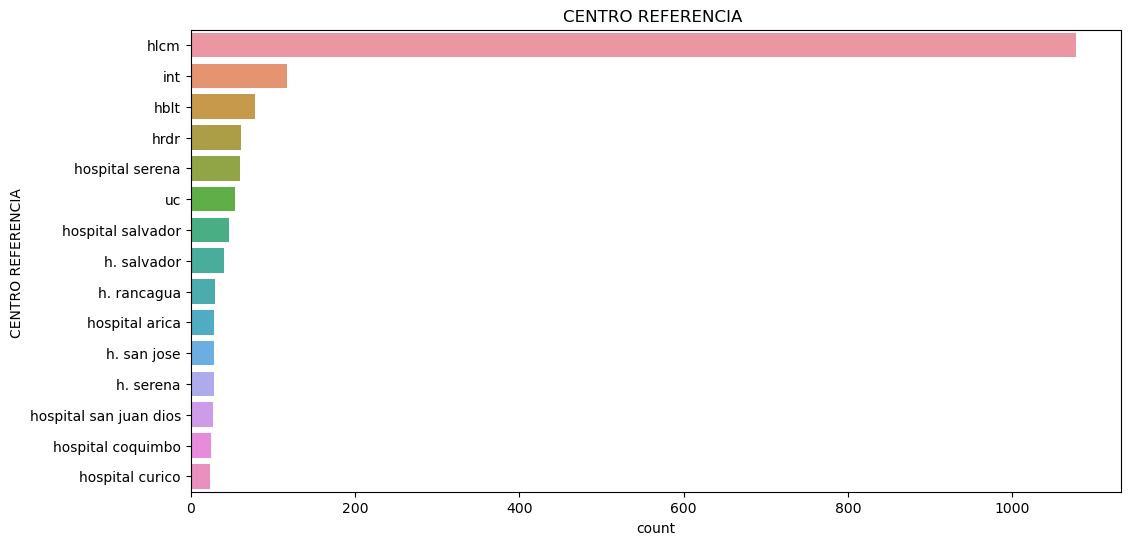

-----------------------------------------
-----------------------------------------
Analizando Region
Hay 84 valores distintos


,Frecuencia,Porcentaje
region metropolitana,1694,0.479344
7 region,257,0.072722
8 region,241,0.068195
4 region,216,0.061121
6 region,199,0.056310
...,...,...
region motripolitana,1,0.000283
vi region libertador general bernardo o'higgins,1,0.000283
region valpariso,1,0.000283
region magallanes (xii),1,0.000283


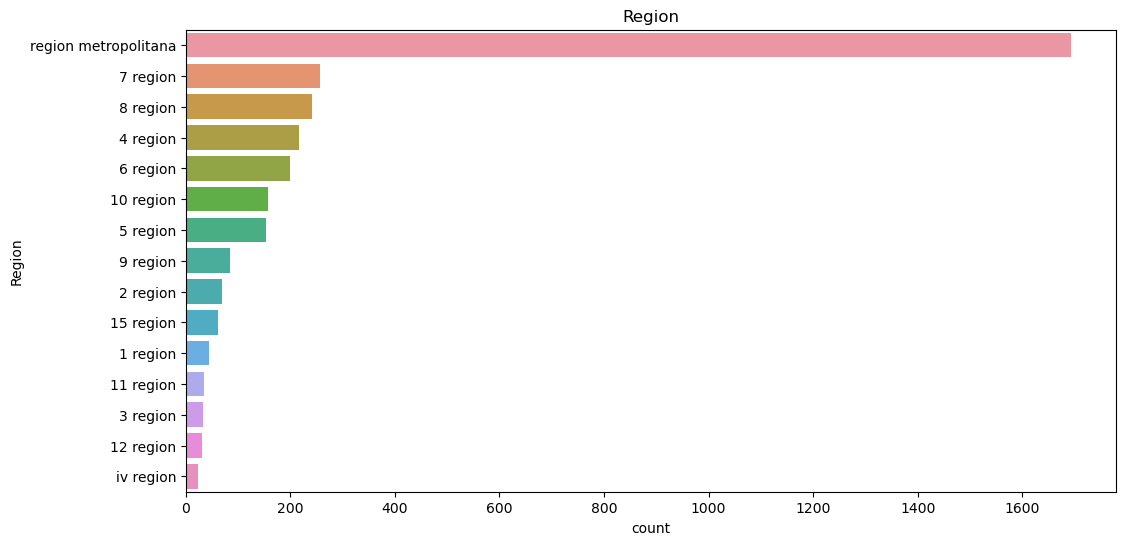

-----------------------------------------
-----------------------------------------
Analizando Clasificación
Hay 33 valores distintos


,Frecuencia,Porcentaje
cianoticas,1201,0.348015
shunt izq derecha,1018,0.294987
miscelaneas,543,0.157346
lesiones obstructivas izquierdas,431,0.124891
shunt izquierda derecha,86,0.024920
obstructivas derechas,84,0.024341
lesiones obstructivas derechas,57,0.016517
ventriculo unico funcional,3,0.000869
cardiopatia congenita,3,0.000869
cianoticos,2,0.000580


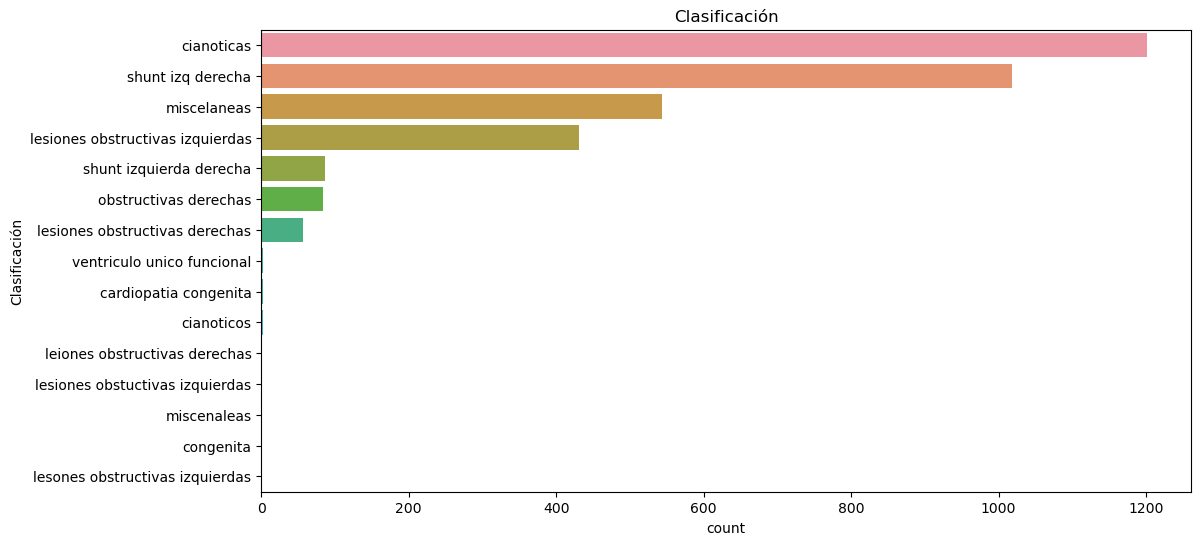

-----------------------------------------
-----------------------------------------
Analizando Procedimiento
Hay 1408 valores distintos


,Frecuencia,Porcentaje
cierre parche,270,0.101887
reparacion ventriculotomia parche transanular,124,0.046792
shunt bt,88,0.033208
cierre dispositivo,81,0.030566
balonplastia,66,0.024906
...,...,...
cierre civ dispositivo percutaneo (2005 dr. romero clinica alemana),1,0.000377
cx reparadora 2002,1,0.000377
"cierre parche, pastia mitral tricuspidea maze derecho.",1,0.000377
reparacion cx 2019: cierre cia-civ-pericardiectomia,1,0.000377


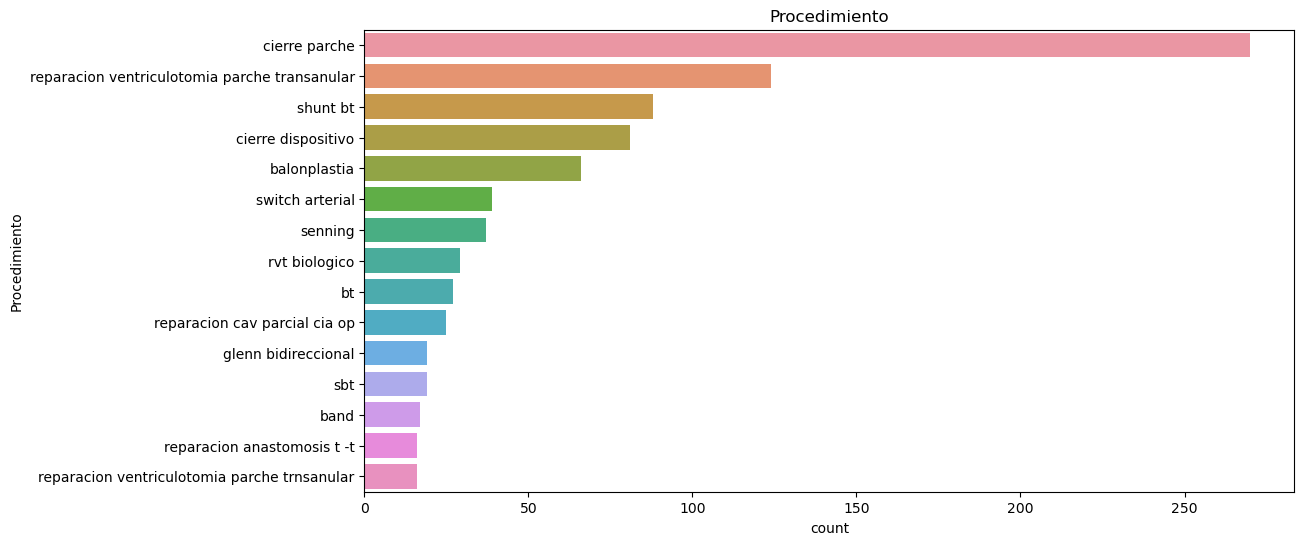

-----------------------------------------
-----------------------------------------
Analizando Complejidad
Hay 16 valores distintos


,Frecuencia,Porcentaje
moderada,1544,0.449752
severa,916,0.266822
baja,867,0.252549
corresponde,29,0.008447
moderado,27,0.007865
leve,14,0.004078
severo,11,0.003204
alta,10,0.002913
moderda,5,0.001456
bajo,3,0.000874


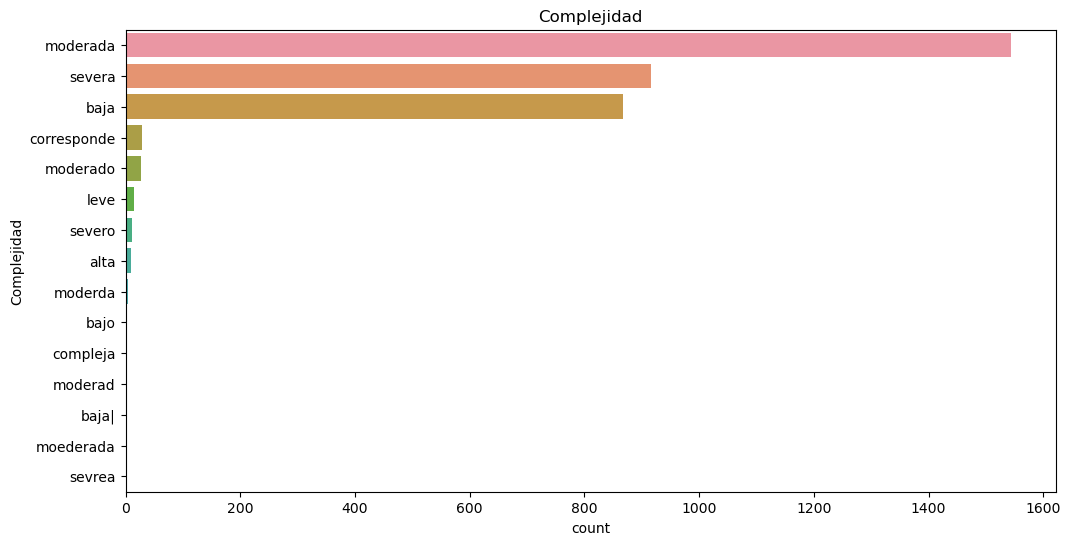

-----------------------------------------


,cantidad_na,porcentaje_na
DIAGNOSTICO PRINCIPAL,505,14.18
HOSPITAL,2711,76.13
SEXO,9,0.25
PREVISION,1219,34.23
CENTRO REFERENCIA,780,21.90
Region,27,0.76
Clasificación,110,3.09
Procedimiento,911,25.58
Complejidad,128,3.59


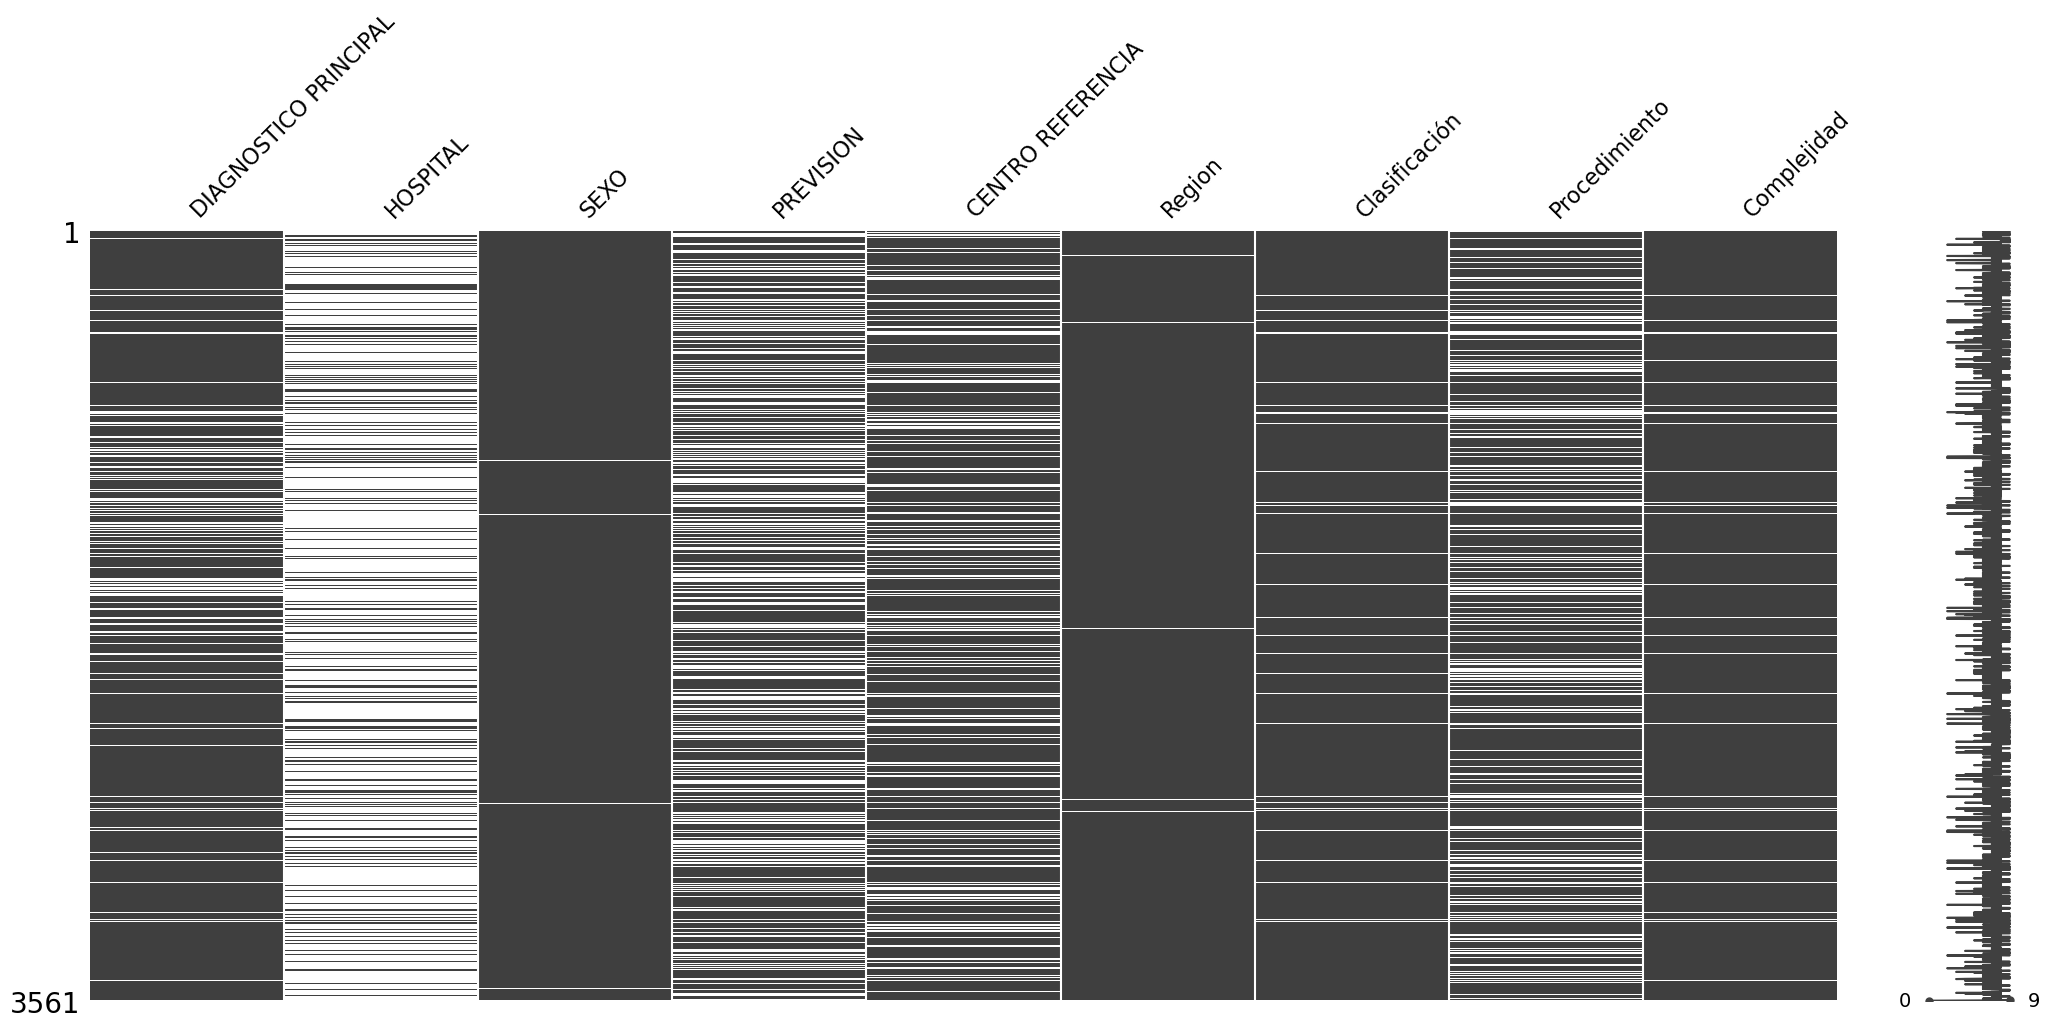

In [ ]:
visualize.analizar_distribucion_y_faltantes_variables(df_procesada[COLS_A_PREPROCESAR_TEXTO])


### Columnas con informacion sensible

Analizando todas las variables categoricas 

-----------------------------------------
Analizando Rut
Hay 3552 valores distintos


,Frecuencia,Porcentaje
986c3e491f61f92f14ab0a0e9d06eaa6c703337d4542600199db3beccd22763fce551912deba848bad7109c54d56c6e3542ddf52f50e4a01b8dc75a76c6bb44b,4,0.001123
582a7d85e2dea00949de2522ae063b738f772e3adb792c26b62e90dab7591a628ea6435024c2e21bf3778ebb0350a576e102e9bbd595edab95ef9a444c2a2aad,2,0.000562
26728c1ff9b8deb49be98eccaf5ee3f5911fd6cb47b4009dd813fce9098bff0efb6866e7da929c33d9cf0170d869c917d38a0fb00d5c64f1a2ee8c8e73f5f63e,2,0.000562
ace1268f30c1e2b1085ca2db7b4ecdadd75b2d29cbfc6bc8f792871fcce321d2564d378424ae4bde027e8c6ca5cc2cbf7f5d47d28fad5bc81c0b972d3642c7ed,2,0.000562
48c0412348db7ff6384240c271c4a04c29d4ebe7506abcbb994e1a8e86910b401cce55a7639495cc8dcaf600aa3371b3fac396a8894f14dc1879bf93f7fb5217,2,0.000562
...,...,...
e0659d9f0bcb95a50f958402ff531a8fc91c6e4a52b4f2e0a31b14ea40ee676f4b0e5920978b4b44590e77bc6f34423f03b1f6176e34f46bd1535b2836453219,1,0.000281
64dbac9369f3ee445182042fd94f9b73e02f354eb2d803fd8359f58dcc239cf585f0dc7ebb4feb9e96e42176fd69d9278433bfa1e4b8d0962676e03eb87a665a,1,0.000281
7477188800e319f05e7cc97b2ca6597172e7eb34abbbdcfc16f0fe7f452180a87a889d6bbd8685c96c6f91e200a44ba9c5e8124e1a106a6aec4679ead6e40cae,1,0.000281
a7d50ba85077b9a5f4c930068220a2041025d1c903c72231b9b5ad25ef0b73e30dc4de4842b1e6c862a33f7ef4e745f332ad1efcb5bcb5a2b9d8a2b2bdae8a6f,1,0.000281


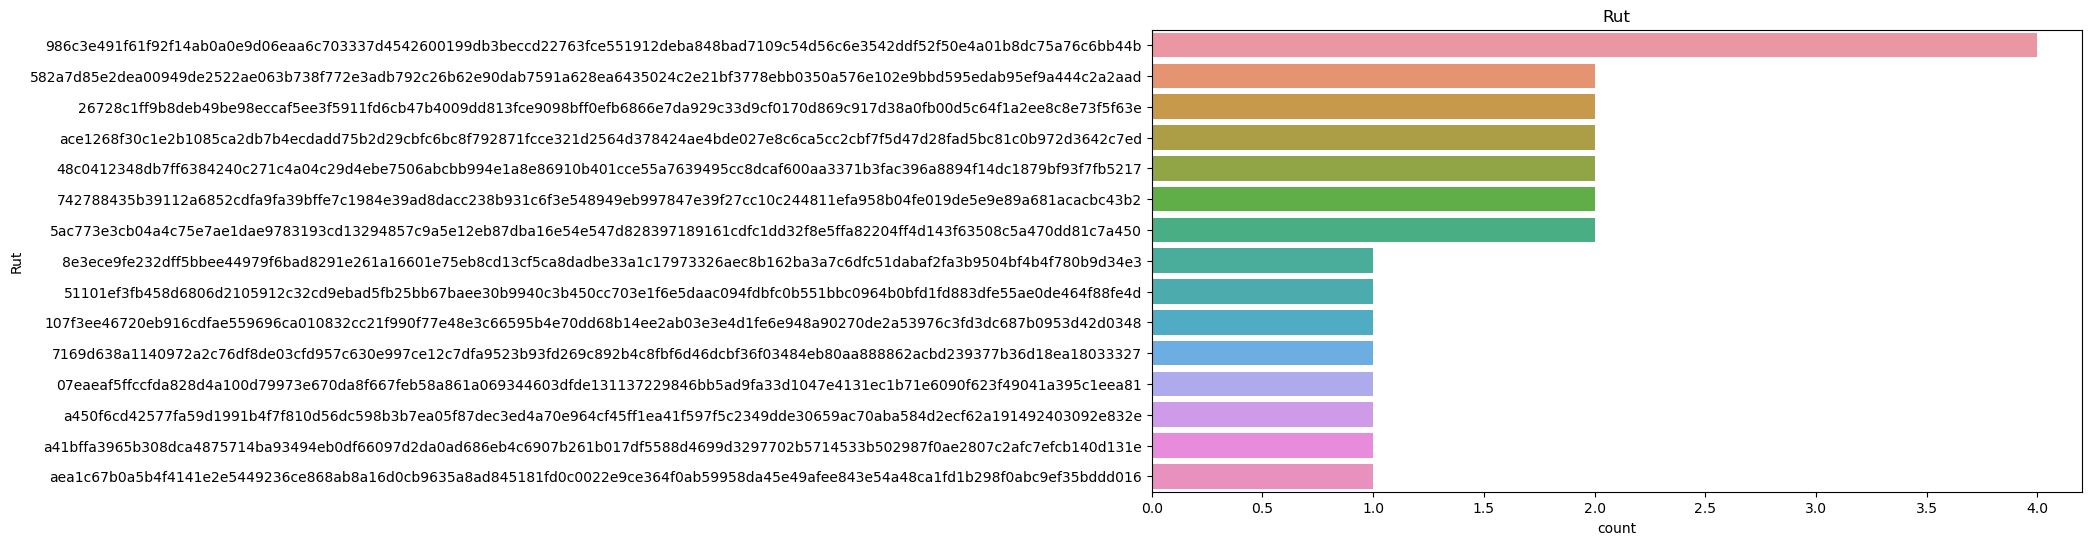

-----------------------------------------
-----------------------------------------
Analizando DIRECCION
Hay 3502 valores distintos


,Frecuencia,Porcentaje
986c3e491f61f92f14ab0a0e9d06eaa6c703337d4542600199db3beccd22763fce551912deba848bad7109c54d56c6e3542ddf52f50e4a01b8dc75a76c6bb44b,36,0.010110
0e0b70c15c04a9b6b5465e7532cf251f663e079aadf8336f27fd2eede61055e87d5e30b1f4f97b44434b817ed4853384a950fb6e79045afcfeed7a300e1c0dc5,12,0.003370
465a3b98883254927296dfa8aae9cff924f64b5e6e1bf09aa734df6944744c3fae358b9961f61925d8f0261f4e8e9698443bfbb9427d65a68544b5aa3600b11a,3,0.000842
12a1a32c4a2510d597b67172b75ba633e4d707cf7597b7b4e3cf99282b719a8fe7b49b6b75dac5e3b5c2086b37d50fec0d87433912bfa25e7618740b55ad54f8,2,0.000562
146341c0e62578f125fff5e1e9fec5ac9c1a1113f7db43500337b1b59062639a8523bbcf6d94f91bf3e73c95f82846e4abcc4c7169c8c0070ef23b144ee76cc3,2,0.000562
...,...,...
3fcf40e1447d6f458380d9fe4a6079fa07d6c8721fee6dfaae6143d791dc0ac5e371fc02c613438dfbf6de3ca4429186c6120fe6081803c25e886b2264c3bdcb,1,0.000281
4ce02e1caf6ead220f7d000fa14524856ad559882107c9713c415f59e1c25a29e2fc94ccdaf4b47543a8c322793386caaea4512b6763911647f7d626386b92e6,1,0.000281
70dd98963904258b5885eccb3f08c505fb139bf5f17dd2f4aff3a0c0328f3cb4cd3d3e43469ad292ae638c77eef47a0e8e9371ccdd0f8c4edebc7fb880c843a0,1,0.000281
5ba178e2c7a1650da005851eb61411a749d2c3a31b3df0b7a8c9a02c1da499e50db1e4a1406c4c2f021cb780385df81101a3c56c4c24ecb7b8b713a3264e6b49,1,0.000281


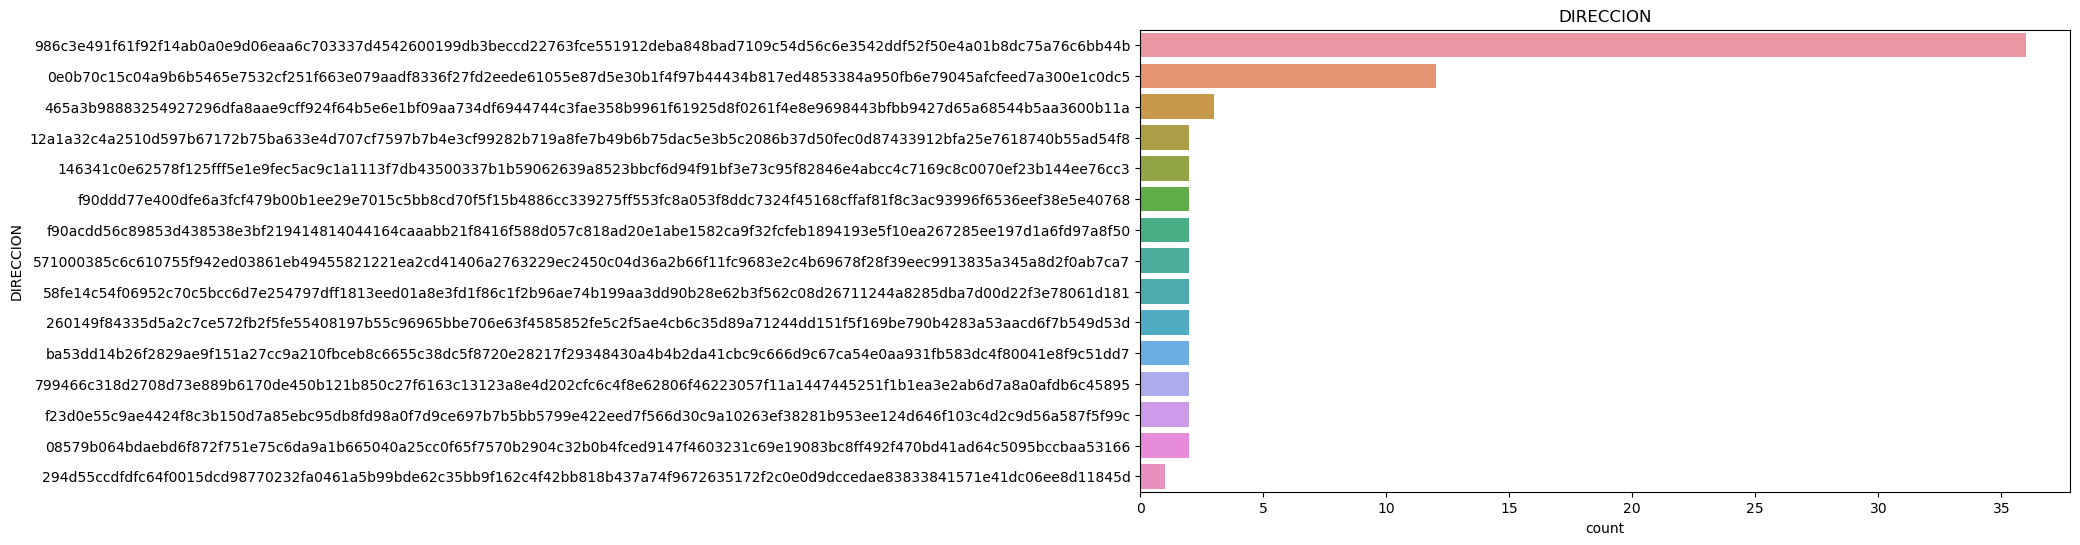

-----------------------------------------
-----------------------------------------
Analizando TELEFONO
Hay 3470 valores distintos


,Frecuencia,Porcentaje
986c3e491f61f92f14ab0a0e9d06eaa6c703337d4542600199db3beccd22763fce551912deba848bad7109c54d56c6e3542ddf52f50e4a01b8dc75a76c6bb44b,85,0.023870
0bd93673bf6ae156b4891c7c4a3dfa07bf5f683b8f6e425dcccf2e033e55c33b7c5c61fbf8e14c4ee0029ae3f10d990ed4c6f9f282047aa226384b98d5446bdf,2,0.000562
5027a7b9de806750f3a09065a0dbeae7295635cb0959b907e675fce0042affcc1d130678d9ce98233d94624c6c86235afc2cb50e674e729c930204ae48f2ac6c,2,0.000562
3175f2fe51fc0acaf5d282d9fd916a01e023101da015c6fc87d645143d3a0710ba85ce4ec3836aab0b05e8767ea6484a10e03fdb7eca7fa690b520b0188ca927,2,0.000562
e1ae3cf7d47cf5174716b3cd0cfb4a864b49a7c10ef83a291b8103c78e3a92061eb2faeee1027cefa74aad73cbbe424cdae66f68bd13e5672aa8cbf6a44f9e56,2,0.000562
...,...,...
dad12c93f0c4623089d87d0f047d2958051ee080e02dafc0dd6257c44f5d6ce64ecd4d0d2ce1809061ba7c4b3aeec1194b221bddcaa5ce5fac379a0ffdb5c476,1,0.000281
a87ba1bf698e868681b6ca76fb9c961cb1afa7030346a2b3cd9d3be8b479b3498b928cb8002276e2dab1c36597ab69120984447115b37104f37c99bbc5b28a5e,1,0.000281
2b4c9764dabbcf79fbfd8cd5561bd960eb0c1ed88016c4ca2e4c7eb830dd2f41a34e05565dfe75687ef45233942bcd36dd52ca4c5be70287f9c058dcd06a7de2,1,0.000281
6dee7f87010313b961933826914816a4be33da09098bb5eaa49b0bf9a522b5fba991115380faff095e0736a0733976be2a46954e3a38c59518a2422b37fa05cd,1,0.000281


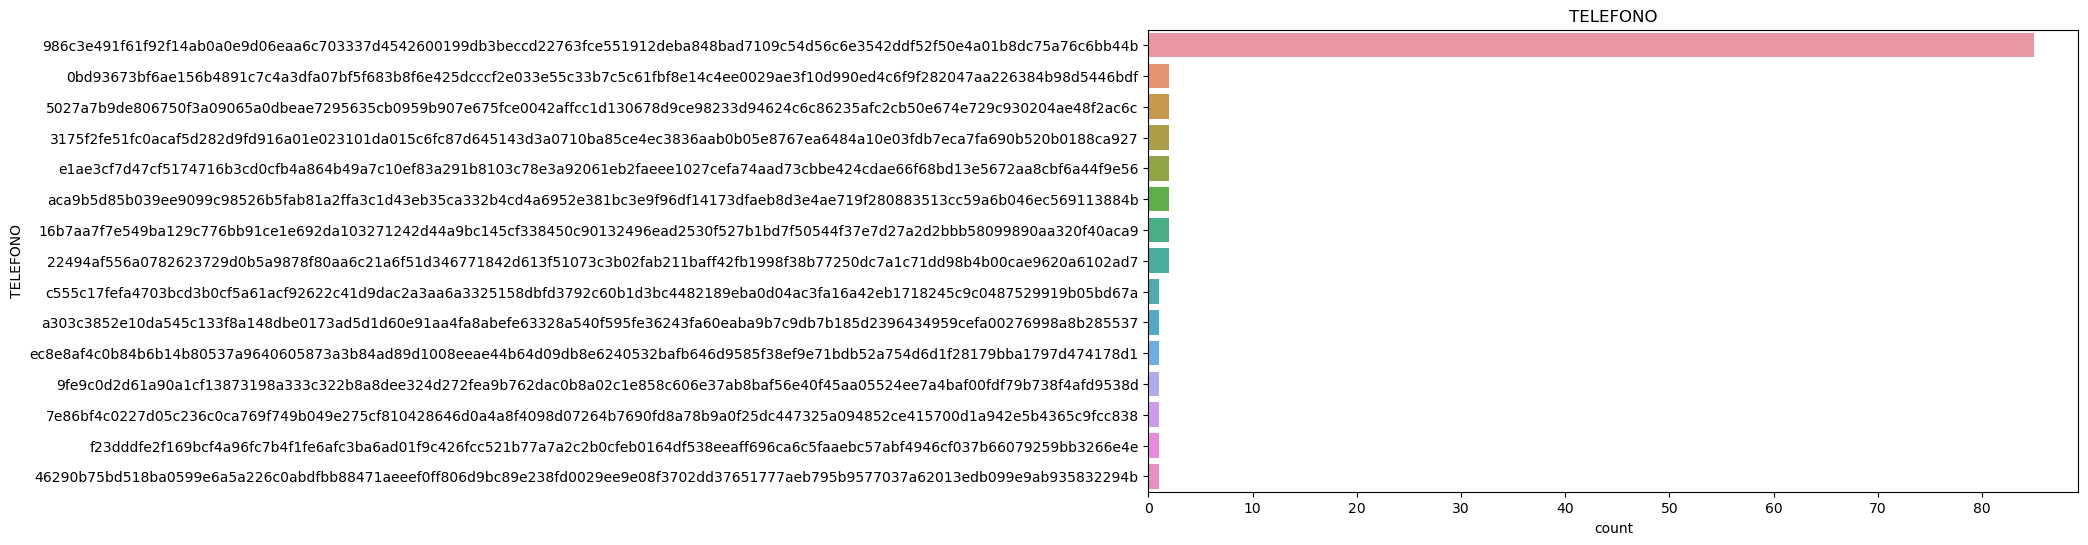

-----------------------------------------
-----------------------------------------
Analizando CORREO
Hay 1099 valores distintos


,Frecuencia,Porcentaje
986c3e491f61f92f14ab0a0e9d06eaa6c703337d4542600199db3beccd22763fce551912deba848bad7109c54d56c6e3542ddf52f50e4a01b8dc75a76c6bb44b,2460,0.690817
22494af556a0782623729d0b5a9878f80aa6c21a6f51d346771842d613f51073c3b02fab211baff42fb1998f38b77250dc7a1c71dd98b4b00cae9620a6102ad7,3,0.000842
2a6703d534e80b095c7d17e843c24af5165f49254977d0a41531af6216c275d65e3be87d361bc2b85c2e977152d5f9aea306ec9b00fdb39845d450c0bf604591,2,0.000562
e0dcd74d7e432c6c96a53e7665f2c4db6e4b6bc63749e50baec70ba6d7b3a48e6d23d1c6b146170014da803c1de457d03f77a75778d71c025456dd19f8fa0c98,1,0.000281
9456b1d9bc9360e541cf93fef367c11e5b09ef7887fec1e8b24d1b032270045a5ce4777918530cc41a387197267be74cebfe4a678d9a289471e7b75b5921044e,1,0.000281
...,...,...
02f13c3381718f2db4df72b0fcbec1e2272572e26665606bde6556c7662af11302b19fe45474676fcb45eb33e29200a25c119bc7433e80a805edc10d8afc4a21,1,0.000281
4f790a8ad9b006d563f7854efe84eb3c377afaccc350829a82fbd9847495f7f26d8cf2f6da13eee1858b45b552887230660873e9b025b66c3c408aa89adc2fb8,1,0.000281
4caee924219b30dd69e421d9b0b75790bb09d17a506890f56c0f537d04c962cc2267e1563fa8f00355f8795082a0e7c4ba0b088d11bc13904b0fcb54c222ff31,1,0.000281
3a2c166ff22905f3d60d403cd371d2db707a135cef17b1e6f22dcdf5780311de92484d5107d713f2fd6831ef74563ba4cc779ba8335ea6feeb86f29810e6e7d4,1,0.000281


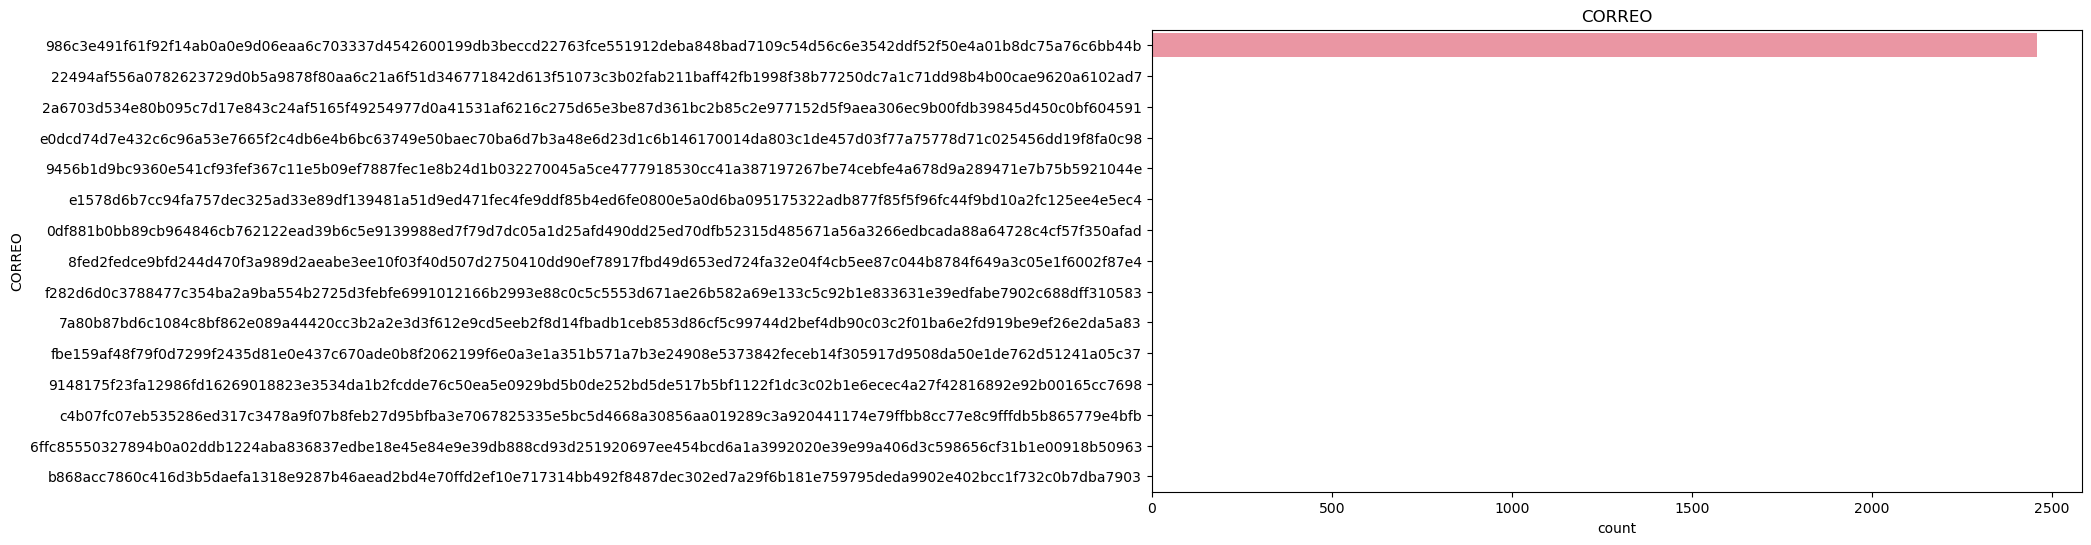

-----------------------------------------


,cantidad_na,porcentaje_na
Rut,0,0.0
DIRECCION,0,0.0
TELEFONO,0,0.0
CORREO,0,0.0


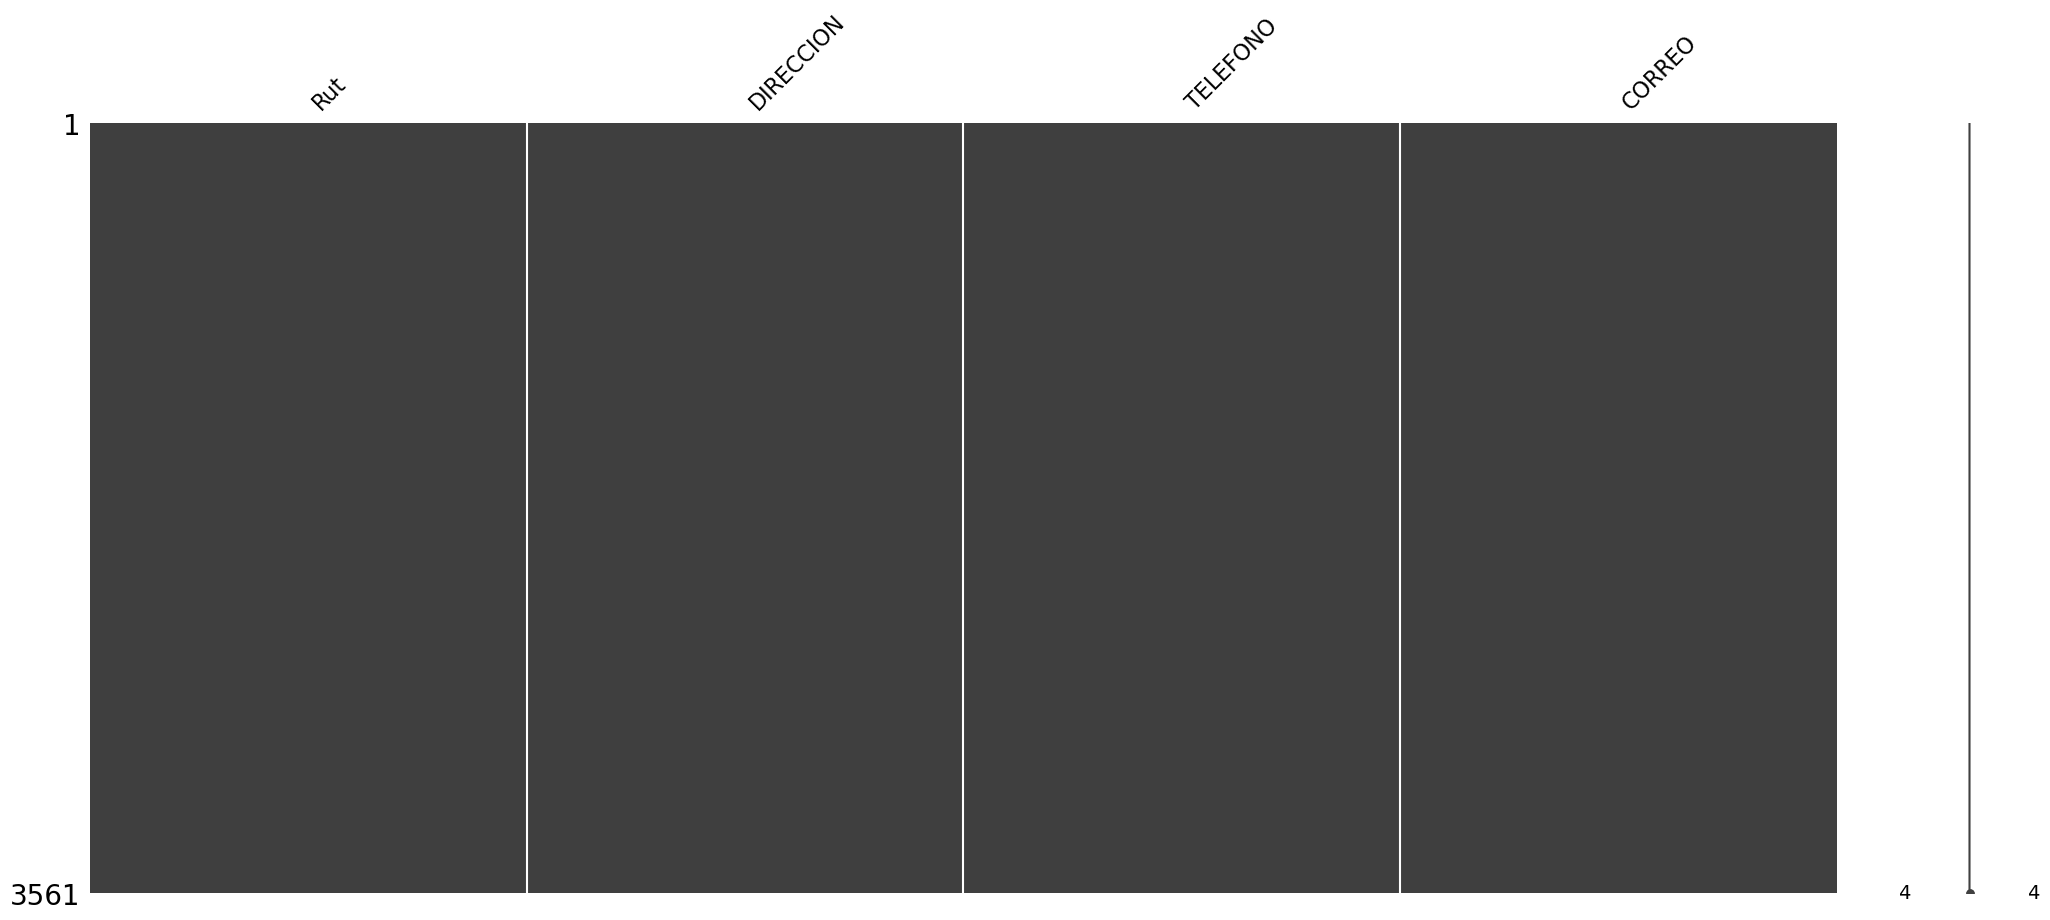

In [ ]:
visualize.analizar_distribucion_y_faltantes_variables(df_procesada[COLS_INFO_SENSIBLE])


### Columna de Primera Fecha

- La columna presenta 1376 fechas distintas.
- Algunos valores tienen texto

In [8]:
fechas_parseadas = df["FECHA 1º evaluación"].apply(lambda x: isinstance(x, datetime))
fechas_no_parseadas = df[~fechas_parseadas]["FECHA 1º evaluación"].value_counts()


In [9]:
display(fechas_no_parseadas)

25-8-2020 (Presencial)                              3
21 julio 2020 (Politelefonico por Contingencia)     2
25 agosto 2020 (Presencial)                         2
5/082014                                            1
04/08/2020 (poli telefonico)                        1
30/09/2020 (Presencial)                             1
09/002/2016                                         1
16-3-2022 hospitalizada                             1
31/07/20188                                         1
26-05-202                                           1
8-092020 (oli Presencial)                           1
27/10/2020 (Poli Presencial)                        1
08/04/2003                                          1
0705/2019                                           1
22 sept 2020 (Presencial)                           1
06/11/25018                                         1
11/10/21016                                         1
27/11/0212                                          1
30/09/2020 (Preencial)      

In [10]:
fechas_con_str = (
    fechas_no_parseadas.index.to_series()
    .str.split("hospitalizada|\(", regex=True)
    .str[0]
    .str.strip(" |\.")
    .str.lower()
    .str.replace("enero", "01")
    .str.replace("febrero", "02")
    .str.replace("marzo", "03")
    .str.replace("abril", "04")
    .str.replace("mayo", "05")
    .str.replace("junio", "06")
    .str.replace("julio", "07")
    .str.replace("agosto", "08")
    .str.replace("septiembre", "09")
    .str.replace("sept", "09")
    .str.replace("octubre", "10")
    .str.replace("noviembre", "11")
    .str.replace("diciembre", "12")
    .str.replace("'", "")
    .str.replace("-| ", "/", regex=True)
    # .str.split("-| |/", regex=True)
)

### Resultados de Comparacion base original y preprocesada

- En la siguiente tabla se muestran los resultados al comparar las columnas preprocesadas

Columna|glosas_distintas_original|glosas_distintas_preprocesadas|
-------|-------------------------|------------------------------|
DIAGNOSTICO PRINCIPAL|335|186|
HOSPITAL|49|41|
SEXO|6|4|
PREVISION|40|24|
CENTRO REFERENCIA |545|364|
Region|182|84|
Clasificación|78|33|
Procedimiento|1541|1408|
Complejidad|40|16|

## Obtener RUTS de Pacientes con datos anomalos

- Un dato anomalo sera considerado cuando cumpla alguna de las siguientes condiciones:
    - Tenga un RUT repetido
    - Carezca de 1° fecha de evaluacion
    - Carezca de Diagnostico Principal

In [ ]:
ruts_repetidos = df["Rut"].value_counts()[df["Rut"].value_counts() >= 2]
ruts_faltantes = df[df["Rut"].isna()]
primera_evaluacion_faltante = df[df["FECHA 1º evaluación"].isna()]
diag_principal_faltante = df[df["DIAGNOSTICO PRINCIPAL"].isna()]


In [ ]:
with pd.ExcelWriter("../data/interim/datos_anomalos_base.xlsx") as file:
    ruts_repetidos.to_excel(file, sheet_name="ruts_repetidos")
    ruts_faltantes.to_excel(file, sheet_name="ruts_faltantes")
    primera_evaluacion_faltante.to_excel(file, sheet_name="primera_evaluacion_faltante")
    diag_principal_faltante.to_excel(file, sheet_name="diag_principal_faltante")
